In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os 
import glob
import cv2
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [2]:
!conda install -y gdown

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.12.7  |       ha878542_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    filelock-3.8.2             |     pyhd8ed1ab_0          14 KB  conda-forge
    gdown-4.6.0                |     pyhd8ed1ab_0          18 KB  conda-forge
    openssl-1.1.1s             |       h0b41bf4_1         1.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages

In [3]:
# https://drive.google.com/file/d/{FILE_ID}/view?usp=sharing
!gdown --id 1N2bB09sS1EGPYj0ewWGhOX7SdR82K4Y_

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1N2bB09sS1EGPYj0ewWGhOX7SdR82K4Y_
To: /kaggle/working/Copy of NN Dataset.zip
100%|████████████████████████████████████████| 274M/274M [00:29<00:00, 9.42MB/s]


In [4]:
!unzip -q "/kaggle/working/Copy of NN Dataset.zip"

In [5]:
print(f"{tf.test.is_gpu_available()}")

True


2022-12-17 20:22:19.484536: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-17 20:22:19.512859: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 20:22:19.602932: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 20:22:19.603831: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [6]:
train_path = r"/kaggle/working/Train"
test_path =r"/kaggle/working/Test"

In [7]:
train_imgs=os.listdir(train_path)
test_imgs=os.listdir(test_path)

In [8]:
code = {'Basketball' : 0 , 'Football' : 1 , 'Rowing' : 2 , 'Swimming' :3 ,"Tennis" : 4 , "Yoga" : 5}

def get_name(n):

    for x,y in code.items() :
        if y == n :
            return x

In [9]:
#get labels for training
train_labels = []

for cur_img in train_imgs:
    if "Basketball" in cur_img :
        label = (code["Basketball"])
    elif "Football" in cur_img :
        label = (code["Football"])
    elif "Rowing" in cur_img :
        label = (code["Rowing"])
    elif "Swimming" in cur_img :
        label = (code["Swimming"])
    elif "Tennis" in cur_img :
        label = (code["Tennis"])
    elif "Yoga" in cur_img :
        label = (code["Yoga"])

    train_labels.append(label)

In [10]:
#reading images 
def reading_resize(train_imgs,train_path,image_size):
    l=[]
    for g in train_imgs:   
        img_path=os.path.join(train_path,g)
        img=cv2.imread(img_path)   
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        res = cv2.resize(img, (image_size, image_size))
        l.append(res)
        
    return l

In [11]:
#reading trining data
image_size=224
l_train=reading_resize(train_imgs,train_path,image_size)

In [12]:
#reading test data
l_test=reading_resize(test_imgs,test_path,image_size)

In [13]:
train = np.array(l_train)
labels=np.array(train_labels)
print(train.shape)

(1681, 224, 224, 3)


In [14]:
test = np.array(l_test)
print(test.shape)

(688, 224, 224, 3)


Swimming


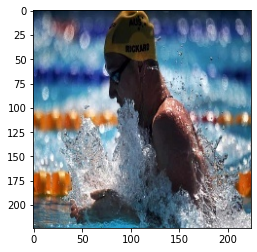

In [15]:
plt.imshow(train[0])
print(get_name(labels[0]))

In [16]:
pd.DataFrame(labels).value_counts()

5    458
1    400
3    240
2    202
0    196
4    185
dtype: int64

Text(0, 0.5, 'Number of images')

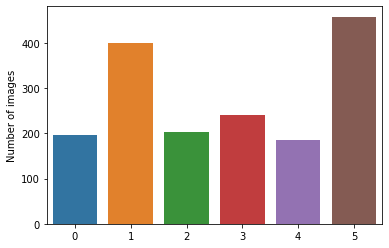

In [17]:
import seaborn as sns
sns.countplot(labels)
plt.ylabel('Number of images')

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train , labels, test_size = 0.2,stratify=labels,shuffle=True)

X_train =X_train/255.0
X_val =X_val/255.0

In [19]:
# Train labels
y_train=tf.keras.utils.to_categorical(y_train)

# Test labels
y_val=tf.keras.utils.to_categorical(y_val)

In [20]:
y_train.shape

(1344, 6)

In [21]:
size=224
model=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(size, size, 3)),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.MaxPool2D((2,2)),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(6,activation=tf.nn.softmax)

])
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
#model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        1

2022-12-17 20:26:58.265706: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 20:26:58.266631: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 20:26:58.267277: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 20:26:58.268276: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 20:26:58.268967: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [37]:
tf.random.set_seed(42)

# Compile
optim = tf.keras.optimizers.SGD(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['accuracy'])

Epochs=30

#checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_best_only=True, save_weights_only=True, verbose=1)
history = model.fit(X_train,y_train,
                    epochs=Epochs,
                    validation_data=(X_val,y_val),
                    batch_size=32,
                    verbose=1)
# callbacks=[early_stopping]
# early_stop = EarlyStopping(patience=5,monitor='val_loss',restore_best_weights=True)

Epoch 1/30
42/42 [==============================] - 21s 489ms/step - loss: 1.1897 - accuracy: 0.9249 - val_loss: 1.5030 - val_accuracy: 0.8427
Epoch 2/30
42/42 [==============================] - 1s 33ms/step - loss: 1.1672 - accuracy: 0.9397 - val_loss: 1.4306 - val_accuracy: 0.8694
Epoch 3/30
42/42 [==============================] - 1s 33ms/step - loss: 1.1601 - accuracy: 0.9360 - val_loss: 1.3904 - val_accuracy: 0.8754
Epoch 4/30
42/42 [==============================] - 1s 33ms/step - loss: 1.1681 - accuracy: 0.9241 - val_loss: 1.3959 - val_accuracy: 0.8694
Epoch 5/30
42/42 [==============================] - 1s 33ms/step - loss: 1.1771 - accuracy: 0.9293 - val_loss: 1.4707 - val_accuracy: 0.8516
Epoch 6/30
42/42 [==============================] - 1s 33ms/step - loss: 1.1386 - accuracy: 0.9457 - val_loss: 1.4198 - val_accuracy: 0.8665
Epoch 7/30
42/42 [==============================] - 1s 33ms/step - loss: 1.1354 - accuracy: 0.9449 - val_loss: 1.4257 - val_accuracy: 0.8635
Epoch 8/30


In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

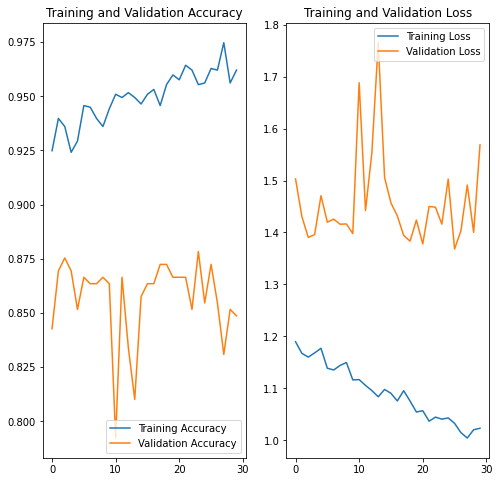

In [38]:
#doctor 
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(Epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [39]:
#excellent for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_generator = ImageDataGenerator(    
    rotation_range=0.5,
    width_shift_range=0.2,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
)

In [40]:
# tf.random.set_seed(42)

Batch_size=32

history = model.fit(train_generator.flow(X_train,y_train
                                         ,batch_size=Batch_size,
                                        seed=27,
                                        shuffle=False),
                    epochs=Epochs,
                    steps_per_epoch=X_train.shape[0] // Batch_size,
                    validation_data=(X_val,y_val),
                    verbose=1)
#callbacks=[early_stopping]

Epoch 1/30
42/42 [==============================] - 15s 339ms/step - loss: 1.3295 - accuracy: 0.8698 - val_loss: 1.3783 - val_accuracy: 0.8576
Epoch 2/30
42/42 [==============================] - 14s 337ms/step - loss: 1.2663 - accuracy: 0.8802 - val_loss: 1.3477 - val_accuracy: 0.8843
Epoch 3/30
42/42 [==============================] - 13s 315ms/step - loss: 1.2815 - accuracy: 0.8765 - val_loss: 1.6589 - val_accuracy: 0.8131
Epoch 4/30
42/42 [==============================] - 14s 331ms/step - loss: 1.2530 - accuracy: 0.8787 - val_loss: 1.4959 - val_accuracy: 0.8309
Epoch 5/30
42/42 [==============================] - 14s 321ms/step - loss: 1.2434 - accuracy: 0.8810 - val_loss: 1.4242 - val_accuracy: 0.8338
Epoch 6/30
42/42 [==============================] - 13s 318ms/step - loss: 1.2510 - accuracy: 0.8780 - val_loss: 1.3436 - val_accuracy: 0.8635
Epoch 7/30
42/42 [==============================] - 14s 325ms/step - loss: 1.2359 - accuracy: 0.8891 - val_loss: 1.3632 - val_accuracy: 0.8487

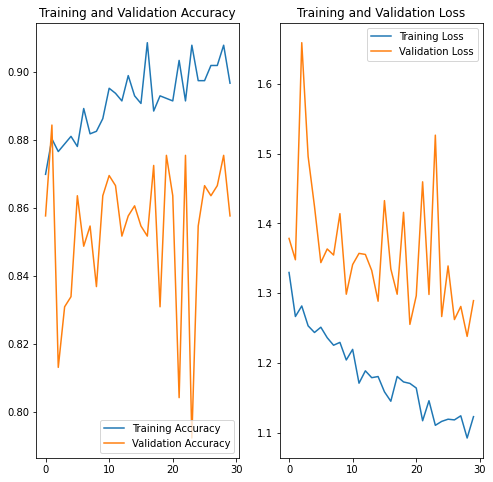

In [41]:
#doctor 
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(Epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [55]:
saved_keras_model_filepath = './{}.h5'.format("ver1 best right model")

model.save(saved_keras_model_filepath)

In [42]:
model.evaluate(X_val,y_val)

11/11 [==============================] - 0s 12ms/step - loss: 1.2891 - accuracy: 0.8576


[1.2890855073928833, 0.857566773891449]

In [43]:
p=model.predict(X_val)

In [52]:
np.argmax(p[0])
y_val[0]

array([0., 0., 0., 1., 0., 0.], dtype=float32)

In [48]:
get_name(np.argmax(p[0])) ,get_name(np.argmax(y_val[0]))

('Swimming', 'Swimming')

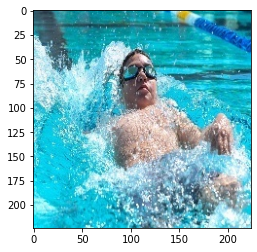

Swimming


In [49]:
plt.imshow(X_val[0],cmap=plt.cm.binary)#cmap means how the imgae to be presented
plt.show()
print(get_name(np.argmax(p[0])))

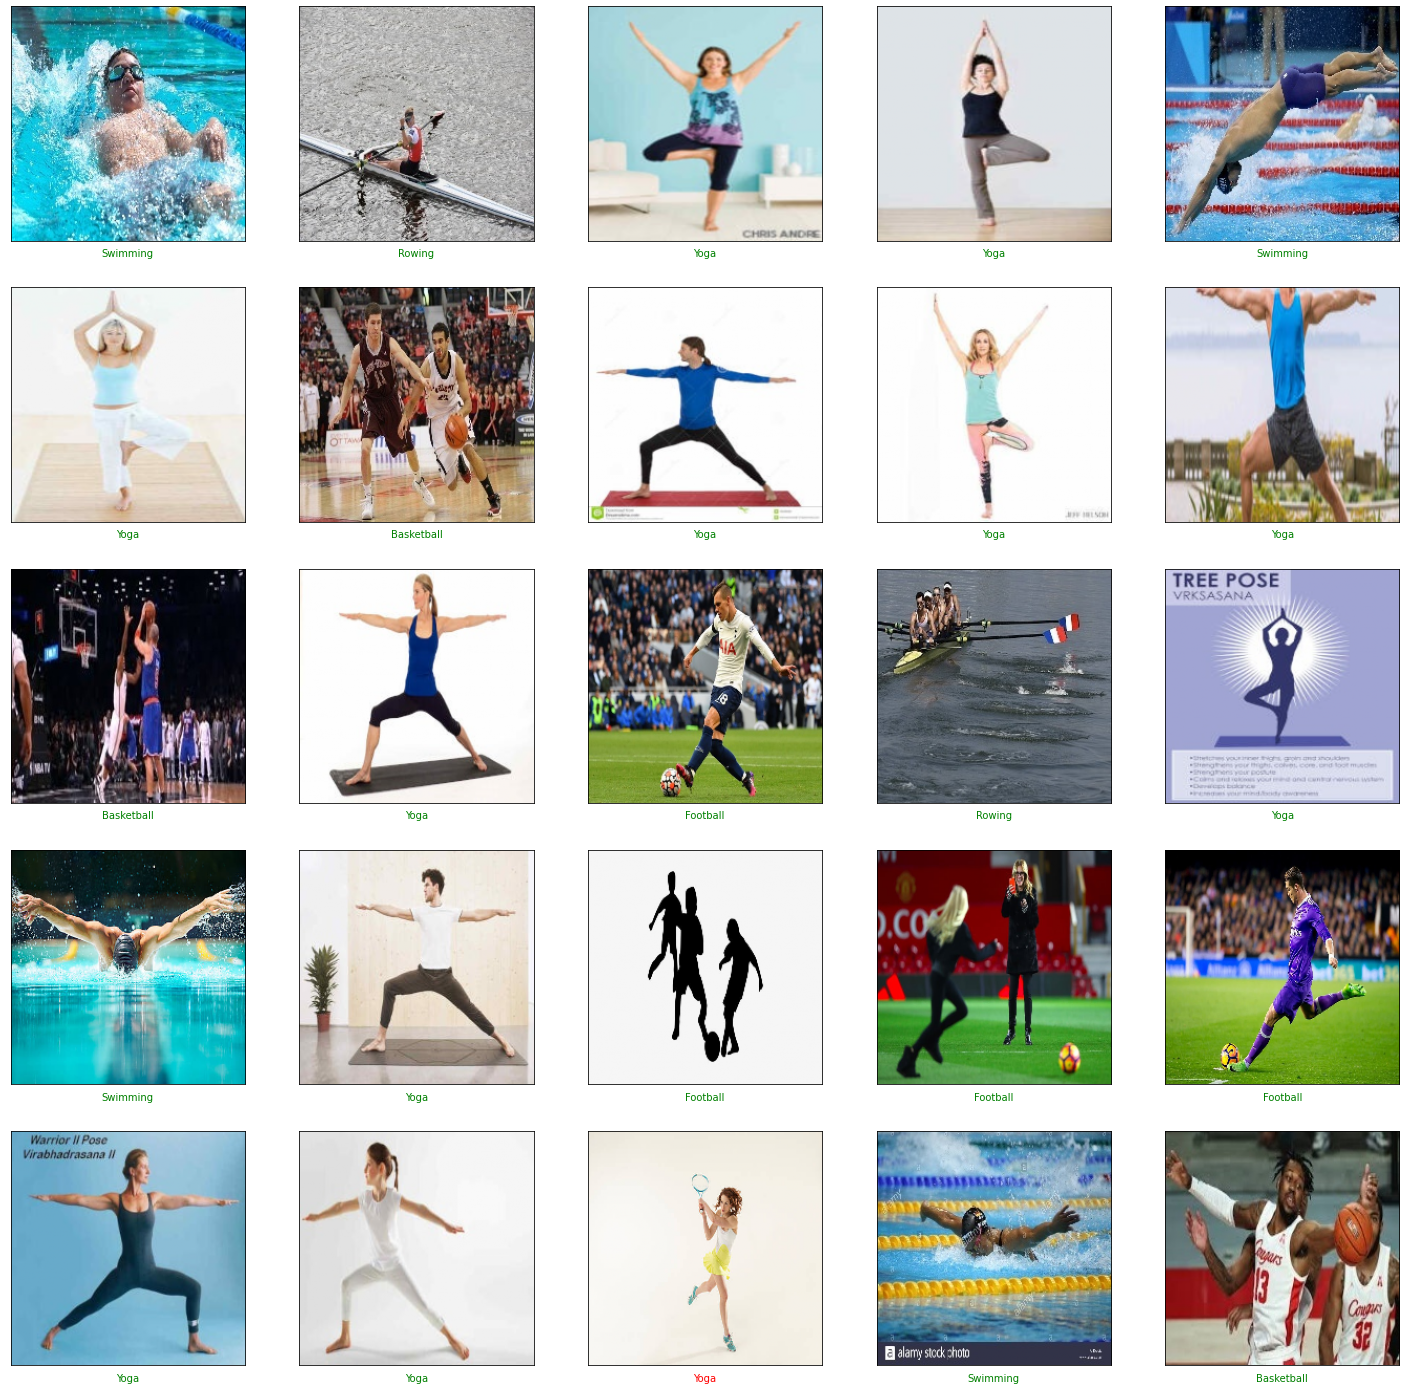

In [54]:
#pred
p=model.predict(X_val)

plt.figure(figsize=(25,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_val[i])
    color = 'green' if get_name(np.argmax(p[i])) == get_name(np.argmax(y_val[i])) else 'red'
    plt.xlabel(get_name(np.argmax(p[i])),color=color)
plt.show()